<a href="https://colab.research.google.com/github/kennycaiguo/-LearnPytorchWithColab/blob/main/torch_tutorial_lesson2_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NN

In [5]:
# nn
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, num_classes)

    def forward(self,x):
      x = F.relu(self.fc1(x))
      x = self.fc2(x)
      return x

# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(device)
#超参数设置
input_size = 784
num_classes = 10
learnng_rate = 0.001

batch_size = 64
num_epochs = 1

# 加载数据集
train_dataset = datasets.MNIST(root="dataset/",train=True,transform=transforms.ToTensor(),download=True)
train_loader = DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)

test_dataset = datasets.MNIST(root="dataset/",train=False,transform=transforms.ToTensor(),download=True)
test_loader = DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=True)
# 初始化神经网络
model = NN(input_size=input_size,num_classes=num_classes).to(device)

#损失函数和优化器
criteron = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learnng_rate)

#训练模型
for epoch in range(num_epochs):
  for batch_idx,(data,targets) in enumerate(train_loader):
    # 把数据发送到cuda(如果可用)
    data=data.to(device=device)
    targets=targets.to(device=device)
    # print(data.shape)
    # get the correct shape
    data = data.reshape(data.shape[0],-1)
    # forward
    scores = model(data)
    # loss
    loss = criteron(scores,targets)
    # 反向传播
    optimizer.zero_grad() # 清空优化器的梯度缓存
    loss.backward()

    #梯度下降炒操作
    optimizer.step()

#模型验证,检验准确率
def check_accuracy(loader,model):
  if loader.dataset.train:
    print("Checking accuracy on Train data")
  else:
    print("Checking accuracy on Test data")
  num_correct = 0
  num_samples = 0
  model.eval()

  with torch.no_grad():
    for x,y in loader:
      x = x.to(device=device)
      y = y.to(device=device)
      x = x.reshape(x.shape[0],-1)

      scores = model(x)
      _,predictions = scores.max(1)
      num_correct += (predictions==y).sum()
      num_samples += predictions.size(0)
    print(f"got {num_correct}/{num_samples} with accuracy:{float(num_correct)/float(num_samples)*100:.2f}")

  model.train()
  return num_correct / num_samples

check_accuracy(train_loader,model)
check_accuracy(test_loader,model)





Checking accuracy on Train data
got 55992/60000 with accuracy:93.32
Checking accuracy on Test data
got 9312/10000 with accuracy:93.12


tensor(0.9312, device='cuda:0')

## CNN也就是卷积神经网络

## CNN网络中输入特征和输出特性的关系
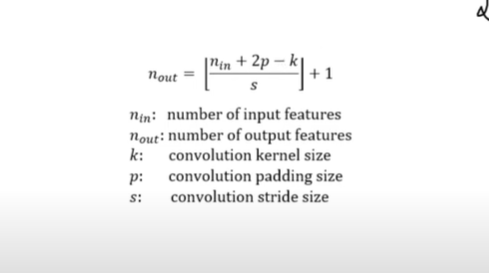

In [1]:
#CNN Convolutional Neural Network
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, num_classes)

    def forward(self,x):
      x = F.relu(self.fc1(x))
      x = self.fc2(x)
      return x

# 创建简单的cnn网络
class CNN(nn.Module):
    def __init__(self, in_channels=1, num_classes=10):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=8,kernel_size=(3,3),stride=(1,1),padding=(1,1))
        self.pool = nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))
        self.conv2 = nn.Conv2d(in_channels=8,out_channels=16,kernel_size=(3,3),stride=(1,1),padding=(1,1))
        self.fc1 = nn.Linear(16*7*7,num_classes)


    def forward(self,x):
      x = F.relu(self.conv1(x))
      x = self.pool(x)
      x = F.relu(self.conv2(x))
      x = self.pool(x)
      x = x.reshape(x.shape[0],-1)
      x = self.fc1(x)
      return x

# model = CNN()
# x = torch.randn(64,1,28,28)
# print(model(x).shape)
# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(device)
#超参数设置
in_channel = 1
num_classes = 10
learnng_rate = 0.001

batch_size = 64
num_epochs = 5

# 加载数据集
train_dataset = datasets.MNIST(root="dataset/",train=True,transform=transforms.ToTensor(),download=True)
train_loader = DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)

test_dataset = datasets.MNIST(root="dataset/",train=False,transform=transforms.ToTensor(),download=True)
test_loader = DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=True)
# 初始化神经网络
# model = NN(input_size=input_size,num_classes=num_classes).to(device)
model = CNN().to(device)
#损失函数和优化器
criteron = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learnng_rate)

#训练模型
for epoch in range(num_epochs):
  for batch_idx,(data,targets) in enumerate(train_loader):
    # 把数据发送到cuda(如果可用)
    data=data.to(device=device)
    targets=targets.to(device=device)
    # forward
    scores = model(data)
    # loss
    loss = criteron(scores,targets)
    # 反向传播
    optimizer.zero_grad() # 清空优化器的梯度缓存
    loss.backward()

    #梯度下降炒操作
    optimizer.step()

#模型验证,检验准确率
def check_accuracy(loader,model):
  if loader.dataset.train:
    print("Checking accuracy on Train data")
  else:
    print("Checking accuracy on Test data")
  num_correct = 0
  num_samples = 0
  model.eval()

  with torch.no_grad():
    for x,y in loader:
      x = x.to(device=device)
      y = y.to(device=device)

      scores = model(x)
      _,predictions = scores.max(1)
      num_correct += (predictions==y).sum()
      num_samples += predictions.size(0)
    print(f"got {num_correct}/{num_samples} with accuracy:{float(num_correct)/float(num_samples)*100:.2f}")

  model.train()
  return num_correct / num_samples

check_accuracy(train_loader,model)
check_accuracy(test_loader,model)





100%|██████████| 9.91M/9.91M [00:00<00:00, 15.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 475kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.36MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.60MB/s]


Checking accuracy on Train data
got 59194/60000 with accuracy:98.66
Checking accuracy on Test data
got 9844/10000 with accuracy:98.44


tensor(0.9844, device='cuda:0')